In [9]:
import rasterio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
import gc

sns.set_theme()

In [4]:
dataset_a_dir = os.path.join('data', 'dataset_16km_300')
dataset_b_dir = os.path.join('data', 'dataset_16km_300_ndsi')

In [5]:
labels_a = pd.read_csv(os.path.join(dataset_a_dir, 'training_labels.csv'))
labels_b = pd.read_csv(os.path.join(dataset_b_dir, 'training_labels.csv'))

In [6]:
def get_image_path(directory:str, station:str, product_id:str) -> str:
    return os.path.join(directory, 'training', station, product_id + '.tif')

In [33]:
image_index = 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image index: 368


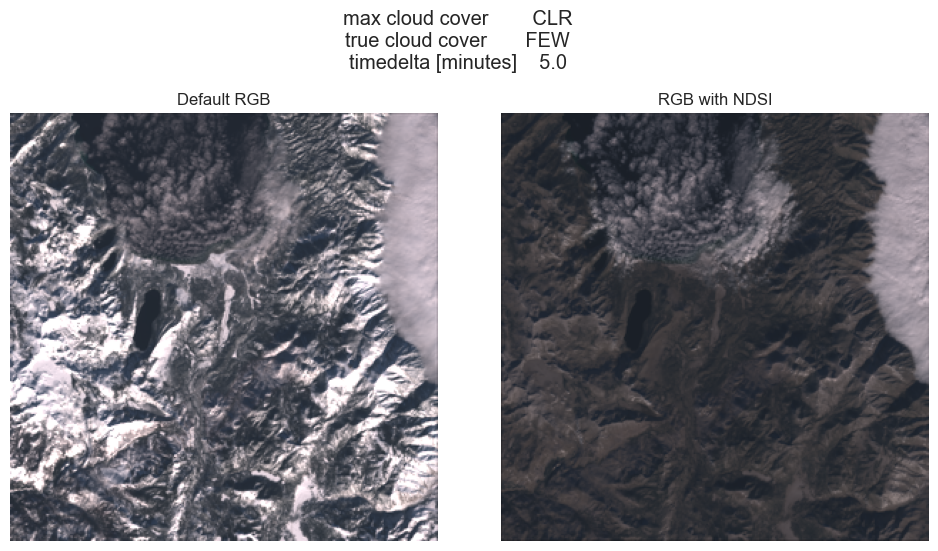

In [406]:
if image_index < len(labels_a):
    print(f'Image index: {image_index}')
    row = labels_a.iloc[image_index]
    station = row['station']
    product_id = row['product_id']
    if any((labels_b['station'] == station) & (labels_b['product_id'] == product_id)):
        image_a = rasterio.open(get_image_path(dataset_a_dir, station, product_id))
        image_b = rasterio.open(get_image_path(dataset_b_dir, station, product_id))
        image_tensors = [torch.from_numpy(image_a.read()), torch.from_numpy(image_b.read())]
        image_a.close()
        image_b.close()

        fig, axs = plt.subplots(figsize=(10,6), ncols=2)
        fig.suptitle(row[['max cloud cover', 'true cloud cover', 'timedelta [minutes]']].to_string(float_format=(lambda x: f'{x:.1f}')))
        fig.tight_layout()
        for i in range(2):
            ax: plt.Axes = axs[i]
            ax.axis('off')
            ax.imshow(image_tensors[i].permute(1, 2, 0))
        axs[0].set_title('Default RGB')
        axs[1].set_title('RGB with NDSI')
    image_index += 1
    gc.collect()

In [380]:
# Go back one image
image_index -= 1